Calculate std(w) in runs with and without bay at particular depths

In [1]:
import cmocean as cmo
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
from matplotlib.gridspec import GridSpecFromSubplotSpec
%matplotlib inline
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from xmitgcm import open_mdsdataset

In [2]:
outdir = '/data/SO2/sio-kramosmusalem/exp06_512x612x100_ORL_SVB/01_SVB_febTS_output/'
outdir2 = '/data/SO2/sio-kramosmusalem/exp06_512x612x100_ORL/01_noSVB_febTS/'

levels = [1,   2,  3,  4,  5,  6,  7,  8,  9, 10, 
          11, 12, 13, 14, 15, 16, 17,
          18, 19, 20, 21, 22, 23, 24, 25,
          26, 27, 28, 29, 30, 31,
          32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
          45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,              
          58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 
          74, 79, 84, 89, 94, 99,]
ds = open_mdsdataset(outdir, prefix=['eta','dynVars'], levels=levels)
ds2 = open_mdsdataset(outdir2, prefix=['eta','dynVars'], levels=levels)

In [29]:
nx = 512
ny = 612
nz = 76
dt = 600
z1 = 25 # Zl[25] = -99 m
z2 = 37 # Zl[37] = -197.2 m
z3 = 45 # Zl[45] = -292.2 m
z4 = 55 # Zl[55] = -508.2 m

depth_nob = ds2.Depth[:]
LAT = ds2['YC'][:]
LON = ds2['XC'][:]-360
lat = ds2.YC[:,0].data
lon = ds2.XC[0,:].data-360

Z = ds2['Z'][:]
Zl = ds2['Zl'][:]

# centers mask
hFacC = ds2['hFacC'][:]
hfac = np.ma.masked_values(hFacC, 0)
mask = np.ma.getmask(hfac)
dep_masked = np.ma.masked_values(depth_nob,0)
mask_dep = np.ma.getmask(dep_masked)
time = np.arange(0,720)*600

# centers mask bathy with bay
depth_bay = ds.Depth[:]
hFacCSVB = ds['hFacC'][:]
hfacSVB = np.ma.masked_values(hFacCSVB, 0)
maskSVB = np.ma.getmask(hfacSVB)

### No bay run

In [31]:
tini = 0
tend = 144

Wacc100 = np.empty((ny,nx))
Wacc200 = np.empty((ny,nx))
Wacc300 = np.empty((ny,nx))
Wacc500 = np.empty((ny,nx))

for tt in range(tini,tend):
    W1 = np.ma.masked_array(ds2.variables['WVEL'][tt,z1,...], mask=mask[z1,:,:])
    Wacc100 = Wacc100 + W1**2   
    
    W2 = np.ma.masked_array(ds2.variables['WVEL'][tt,z2,...], mask=mask[z2,:,:])
    Wacc200 = Wacc200 + W2**2   
   
    W3 = np.ma.masked_array(ds2.variables['WVEL'][tt,z3,...], mask=mask[z3,:,:])
    Wacc300 = Wacc300 + W3**2   
   
    W4 = np.ma.masked_array(ds2.variables['WVEL'][tt,z4,...], mask=mask[z4,:,:])
    Wacc500 = Wacc500 + W4**2   

In [32]:
VarNoB1 = np.nansum((Wacc100*dt))/(time[tend]-time[tini])

VarNoB2 = np.nansum((Wacc200*dt))/(time[tend]-time[tini])

VarNoB3 = np.nansum((Wacc300*dt))/(time[tend]-time[tini])

VarNoB4 = np.nansum((Wacc500*dt))/(time[tend]-time[tini])

1.5936005367885776e-06

In [33]:
tend2 = 288
for tt in range(tend,tend2):
    W1 = np.ma.masked_array(ds2.variables['WVEL'][tt,z1,...], mask=mask[z1,:,:])
    Wacc100 = Wacc100 + W1**2   
    
    W2 = np.ma.masked_array(ds2.variables['WVEL'][tt,z2,...], mask=mask[z2,:,:])
    Wacc200 = Wacc200 + W2**2   
   
    W3 = np.ma.masked_array(ds2.variables['WVEL'][tt,z3,...], mask=mask[z3,:,:])
    Wacc300 = Wacc300 + W3**2   
   
    W4 = np.ma.masked_array(ds2.variables['WVEL'][tt,z4,...], mask=mask[z4,:,:])
    Wacc500 = Wacc500 + W4**2   

In [34]:
VarNoB1_2d = np.nansum((Wacc100*dt))/(time[tend2]-time[tini])
VarNoB1_2d

VarNoB2_2d = np.nansum((Wacc200*dt))/(time[tend2]-time[tini])
VarNoB2_2d

VarNoB3_2d = np.nansum((Wacc300*dt))/(time[tend2]-time[tini])
VarNoB3_2d

VarNoB4_2d = np.nansum((Wacc500*dt))/(time[tend2]-time[tini])
VarNoB4_2d

1.6776544791920499e-06

In [36]:
tend3 = 144*3
for tt in range(tend2,tend3):
    W1 = np.ma.masked_array(ds2.variables['WVEL'][tt,z1,...], mask=mask[z1,:,:])
    Wacc100 = Wacc100 + W1**2   
    
    W2 = np.ma.masked_array(ds2.variables['WVEL'][tt,z2,...], mask=mask[z2,:,:])
    Wacc200 = Wacc200 + W2**2   
   
    W3 = np.ma.masked_array(ds2.variables['WVEL'][tt,z3,...], mask=mask[z3,:,:])
    Wacc300 = Wacc300 + W3**2   
   
    W4 = np.ma.masked_array(ds2.variables['WVEL'][tt,z4,...], mask=mask[z4,:,:])
    Wacc500 = Wacc500 + W4**2     

In [37]:
VarNoB1_3d = np.nansum((Wacc100*dt))/(time[tend3]-time[tini])
VarNoB1_3d

VarNoB2_3d = np.nansum((Wacc200*dt))/(time[tend3]-time[tini])
VarNoB2_3d

VarNoB3_3d = np.nansum((Wacc300*dt))/(time[tend3]-time[tini])
VarNoB3_3d

VarNoB4_3d = np.nansum((Wacc500*dt))/(time[tend3]-time[tini])
VarNoB4_3d

2.069777819203979e-06

In [38]:
tend4 = (144*5)-1
for tt in range(tend3,tend4):
    W1 = np.ma.masked_array(ds2.variables['WVEL'][tt,z1,...], mask=mask[z1,:,:])
    Wacc100 = Wacc100 + W1**2   
    
    W2 = np.ma.masked_array(ds2.variables['WVEL'][tt,z2,...], mask=mask[z2,:,:])
    Wacc200 = Wacc200 + W2**2   
   
    W3 = np.ma.masked_array(ds2.variables['WVEL'][tt,z3,...], mask=mask[z3,:,:])
    Wacc300 = Wacc300 + W3**2   
   
    W4 = np.ma.masked_array(ds2.variables['WVEL'][tt,z4,...], mask=mask[z4,:,:])
    Wacc500 = Wacc500 + W4**2   

In [39]:
VarNoB1_5d = np.nansum((Wacc100*dt))/(time[tend4-1]-time[tini])
VarNoB1_5d

VarNoB2_5d = np.nansum((Wacc200*dt))/(time[tend4-1]-time[tini])
VarNoB2_5d

VarNoB3_5d = np.nansum((Wacc300*dt))/(time[tend4-1]-time[tini])
VarNoB3_5d

VarNoB4_5d = np.nansum((Wacc500*dt))/(time[tend4-1]-time[tini])
VarNoB4_5d

1.7163328831535624e-06

### Run with SVB

In [40]:
Wacc100 = np.empty((ny,nx))
Wacc200 = np.empty((ny,nx))
Wacc300 = np.empty((ny,nx))
Wacc500 = np.empty((ny,nx))

for tt in range(tini,tend):
    W1 = np.ma.masked_array(ds.variables['WVEL'][tt,z1,...], mask=mask[z1,:,:])
    Wacc100 = Wacc100 + W1**2   
    
    W2 = np.ma.masked_array(ds.variables['WVEL'][tt,z2,...], mask=mask[z2,:,:])
    Wacc200 = Wacc200 + W2**2   
   
    W3 = np.ma.masked_array(ds.variables['WVEL'][tt,z3,...], mask=mask[z3,:,:])
    Wacc300 = Wacc300 + W3**2   
   
    W4 = np.ma.masked_array(ds.variables['WVEL'][tt,z4,...], mask=mask[z4,:,:])
    Wacc500 = Wacc500 + W4**2   

In [41]:
VarBay1 = np.nansum((Wacc100*dt))/(time[tend]-time[tini])
VarBay1

VarBay2 = np.nansum((Wacc200*dt))/(time[tend]-time[tini])
VarBay2

VarBay3 = np.nansum((Wacc300*dt))/(time[tend]-time[tini])
VarBay3

VarBay4 = np.nansum((Wacc500*dt))/(time[tend]-time[tini])
VarBay4

4.812228494807618e-06

In [42]:
for tt in range(tend,tend2):
    W1 = np.ma.masked_array(ds.variables['WVEL'][tt,z1,...], mask=mask[z1,:,:])
    Wacc100 = Wacc100 + W1**2   
    
    W2 = np.ma.masked_array(ds.variables['WVEL'][tt,z2,...], mask=mask[z2,:,:])
    Wacc200 = Wacc200 + W2**2   
   
    W3 = np.ma.masked_array(ds.variables['WVEL'][tt,z3,...], mask=mask[z3,:,:])
    Wacc300 = Wacc300 + W3**2   
   
    W4 = np.ma.masked_array(ds.variables['WVEL'][tt,z4,...], mask=mask[z4,:,:])
    Wacc500 = Wacc500 + W4**2   

In [43]:
VarBay1_2d = np.nansum((Wacc100*dt))/(time[tend2]-time[tini])
VarBay1_2d

VarBay2_2d = np.nansum((Wacc200*dt))/(time[tend2]-time[tini])
VarBay2_2d

VarBay3_2d = np.nansum((Wacc300*dt))/(time[tend2]-time[tini])
VarBay3_2d

VarBay4_2d = np.nansum((Wacc500*dt))/(time[tend2]-time[tini])
VarBay4_2d

3.4028499452136277e-06

In [44]:
for tt in range(tend2,tend3):
    W1 = np.ma.masked_array(ds.variables['WVEL'][tt,z1,...], mask=mask[z1,:,:])
    Wacc100 = Wacc100 + W1**2   
    
    W2 = np.ma.masked_array(ds.variables['WVEL'][tt,z2,...], mask=mask[z2,:,:])
    Wacc200 = Wacc200 + W2**2   
   
    W3 = np.ma.masked_array(ds.variables['WVEL'][tt,z3,...], mask=mask[z3,:,:])
    Wacc300 = Wacc300 + W3**2   
   
    W4 = np.ma.masked_array(ds.variables['WVEL'][tt,z4,...], mask=mask[z4,:,:])
    Wacc500 = Wacc500 + W4**2   

In [45]:
VarBay1_3d = np.nansum((Wacc100*dt))/(time[tend3]-time[tini])
VarBay1_3d

VarBay2_3d = np.nansum((Wacc200*dt))/(time[tend3]-time[tini])
VarBay2_3d

VarBay3_3d = np.nansum((Wacc300*dt))/(time[tend3]-time[tini])
VarBay3_3d

VarBay4_3d = np.nansum((Wacc500*dt))/(time[tend3]-time[tini])
VarBay4_3d

2.7756251047855046e-06

In [46]:
for tt in range(tend3,tend4):
    W1 = np.ma.masked_array(ds.variables['WVEL'][tt,z1,...], mask=mask[z1,:,:])
    Wacc100 = Wacc100 + W1**2   
    
    W2 = np.ma.masked_array(ds.variables['WVEL'][tt,z2,...], mask=mask[z2,:,:])
    Wacc200 = Wacc200 + W2**2   
   
    W3 = np.ma.masked_array(ds.variables['WVEL'][tt,z3,...], mask=mask[z3,:,:])
    Wacc300 = Wacc300 + W3**2   
   
    W4 = np.ma.masked_array(ds.variables['WVEL'][tt,z4,...], mask=mask[z4,:,:])
    Wacc500 = Wacc500 + W4**2   

In [47]:
VarBay1_5d = np.nansum((Wacc100*dt))/(time[tend4-1]-time[tini])
VarBay1_5d

VarBay2_5d = np.nansum((Wacc200*dt))/(time[tend4-1]-time[tini])
VarBay2_5d

VarBay3_5d = np.nansum((Wacc300*dt))/(time[tend4-1]-time[tini])
VarBay3_5d

VarBay4_5d = np.nansum((Wacc500*dt))/(time[tend4-1]-time[tini])
VarBay4_5d

2.1467658026259673e-06

### Proportion

In [49]:
perc1 = ((VarBay1-VarNoB1)/VarNoB1)*100
perc1
perc1_2d = ((VarBay1_2d-VarNoB1_2d)/VarNoB1_2d)*100
perc1_2d
perc1_3d = ((VarBay1_3d-VarNoB1_3d)/VarNoB1_3d)*100
perc1_3d
perc1_5d = ((VarBay1_5d-VarNoB1_5d)/VarNoB1_5d)*100
perc1_5d

perc2 = ((VarBay2-VarNoB2)/VarNoB2)*100
perc2
perc2_2d = ((VarBay2_2d-VarNoB2_2d)/VarNoB2_2d)*100
perc2_2d
perc2_3d = ((VarBay2_3d-VarNoB2_3d)/VarNoB2_3d)*100
perc2_3d
perc2_5d = ((VarBay2_5d-VarNoB2_5d)/VarNoB2_5d)*100
perc2_5d

perc3 = ((VarBay3-VarNoB3)/VarNoB3)*100
perc3
perc3_2d = ((VarBay3_2d-VarNoB3_2d)/VarNoB3_2d)*100
perc3_2d
perc3_3d = ((VarBay3_3d-VarNoB3_3d)/VarNoB3_3d)*100
perc3_3d
perc3_5d = ((VarBay3_5d-VarNoB3_5d)/VarNoB3_5d)*100
perc3_5d

perc4 = ((VarBay4-VarNoB4)/VarNoB4)*100
perc4
perc4_2d = ((VarBay4_2d-VarNoB4_2d)/VarNoB4_2d)*100
perc4_2d
perc4_3d = ((VarBay4_3d-VarNoB4_3d)/VarNoB4_3d)*100
perc4_3d
perc4_5d = ((VarBay4_5d-VarNoB4_5d)/VarNoB4_5d)*100
perc4_5d

25.078638514548203

In [53]:
def plot_var(var_bay, var_nobay, percentages, layer_depth):
    fig, (ax,ax1) = plt.subplots(1,2, figsize=(9,3))
    ax.plot([1,2,3,5],var_bay ,'go',markersize=8, label='Bay')
    ax.plot([1,2,3,5],var_nobay ,'o' ,color='lightgreen', 
            label='No Bay')
    ax.set_xlabel('days')
    ax.set_ylabel('$<w^2>$ (m$^2$ s$^{-2}$)')
    ax.set_title('Total w variance at %1.1f m' %layer_depth)
    ax.legend()

    ax1.plot([1,2,3,5],percentages ,'o', color='0.2')
    ax1.set_xlabel('days')
    ax1.set_ylabel(r'($<w_{bay}^2>$-$<w_{noBay}^2>$)/$<w_{noBay}^2>$ %')
    ax1.set_title('Difference bay - no bay at %1.1f m' %layer_depth)
    plt.tight_layout()
    return(ax,ax1)

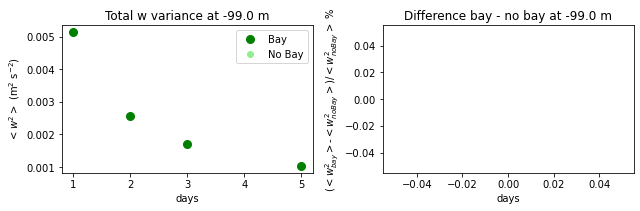

In [54]:
var_bay = [VarBay1, VarBay1_2d, VarBay1_3d, VarBay1_5d]
var_nobay = [VarNoB1, VarNoB1_2d, VarNoB1_3d, VarNoB1_5d]
percentages = [perc1, perc1_2d, perc1_3d, perc1_5d]
layer_depth = Zl[z1]
ax,ax1 = plot_var(var_bay, var_nobay, percentages, layer_depth)

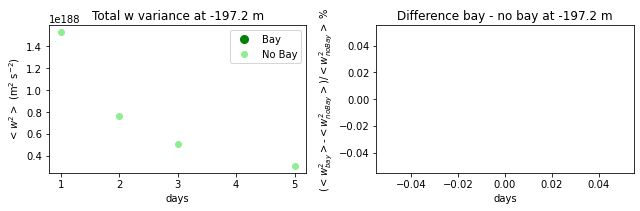

In [55]:
var_bay = [VarBay2, VarBay2_2d, VarBay2_3d, VarBay2_5d]
var_nobay = [VarNoB2, VarNoB2_2d, VarNoB2_3d, VarNoB2_5d]
percentages = [perc2, perc2_2d, perc2_3d, perc2_5d]
layer_depth = Zl[z2]
ax,ax1 = plot_var(var_bay, var_nobay, percentages, layer_depth)

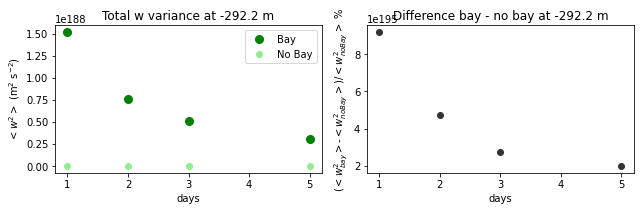

In [56]:
var_bay = [VarBay3, VarBay3_2d, VarBay3_3d, VarBay3_5d]
var_nobay = [VarNoB3, VarNoB3_2d, VarNoB3_3d, VarNoB3_5d]
percentages = [perc3, perc3_2d, perc3_3d, perc3_5d]
layer_depth = Zl[z3]
ax,ax1 = plot_var(var_bay, var_nobay, percentages, layer_depth)

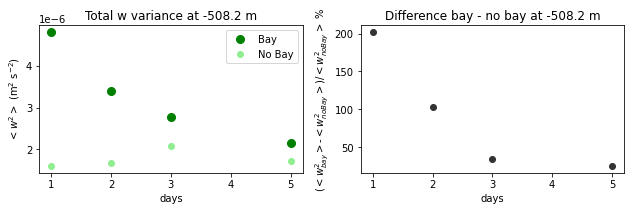

In [57]:
var_bay = [VarBay4, VarBay4_2d, VarBay4_3d, VarBay4_5d]
var_nobay = [VarNoB4, VarNoB4_2d, VarNoB4_3d, VarNoB4_5d]
percentages = [perc4, perc4_2d, perc4_3d, perc4_5d]
layer_depth = Zl[z4]
ax,ax1 = plot_var(var_bay, var_nobay, percentages, layer_depth)

In [59]:
[VarBay1, VarBay1_2d, VarBay1_3d, VarBay1_5d]


[0.005136456429487712,
 0.0025689357550946713,
 0.0017129560409010706,
 0.0010310192509123118]

In [60]:
[VarNoB1, VarNoB1_2d, VarNoB1_3d, VarNoB1_5d]


[nan, nan, nan, nan]

In [61]:
VarNoB3, VarNoB3_2d, VarNoB3_3d, VarNoB3_5d

(1.651343984361409e-06,
 1.5968964528653424e-06,
 1.858023024175661e-06,
 1.5328015821687493e-06)

In [62]:
VarBay3, VarBay3_2d, VarBay3_3d, VarBay3_5d

(1.5163087947672676e+188,
 7.581543973836338e+187,
 5.054362649224225e+187,
 3.0410649922908988e+187)

In [63]:
VarNoB4

1.5936005367885776e-06